In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("day.csv",parse_dates=['dteday'],dayfirst=True)

In [4]:
#convert numeric categorical variables into strings

df.mnth = df[['mnth']].apply(lambda x: x.map({1:"mo01_Jan",2:"mo02_Feb",3:"mo03_Mar",4:"mo04_Apr",
                                 5:"mo05_May",6:"mo06_Jun",7:"mo07_July",8:"mo08_Aug",9:"mo09_Sep",10:"mo10_Oct",11:"mo11_Nov",12:"mo12_Dec"}))
df.weekday = df[['weekday']].apply(lambda x: x.map({6:'day6_Sat',0:'day7_Sun',1:"day1_Mon",2:"day2_Tue",3:"day3_Wed",4:"day4_Thu",5:"day5_Fri"}))
df.weathersit = df[['weathersit']].apply(lambda x: x.map({1:"wthr_Clear",2:"wthr_Misty",3:"wthr_Light_Snow",4:"wthr_Heavy_Rain"}))
df.season = df[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [5]:
df.head(35)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,mo01_Jan,0,day1_Mon,1,wthr_Misty,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,mo01_Jan,0,day2_Tue,1,wthr_Misty,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,mo01_Jan,0,day3_Wed,1,wthr_Clear,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,mo01_Jan,0,day4_Thu,1,wthr_Clear,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,mo01_Jan,0,day5_Fri,1,wthr_Clear,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,2018-01-06,spring,0,mo01_Jan,0,day6_Sat,0,wthr_Clear,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,2018-01-07,spring,0,mo01_Jan,0,day7_Sun,0,wthr_Misty,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,2018-01-08,spring,0,mo01_Jan,0,day1_Mon,1,wthr_Misty,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,2018-01-09,spring,0,mo01_Jan,0,day2_Tue,1,wthr_Clear,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,2018-01-10,spring,0,mo01_Jan,0,day3_Wed,1,wthr_Clear,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [10]:
#df.isnull().sum()

In [7]:
import os
if os.path.exists("month_season.csv"):
    os.remove("month_season.csv")

empty_df = pd.DataFrame(columns=['index',"dteday", "mnth", "season"])

empty_df.to_csv("month_season.csv", header=["index","dteday", "mnth", "season"], index=False)

gp = df.groupby(['mnth'])
for m in ["mo01_Jan","mo02_Feb","mo03_Mar","mo04_Apr",
                                 "mo05_May","mo06_Jun","mo07_July","mo08_Aug","mo09_Sep","mo10_Oct","mo11_Nov","mo12_Dec"]:
    df2 = gp.get_group(m)
    print(type(df2))
    print(df2[['dteday','mnth','season']].head(65))
    df2[['dteday','mnth','season']].to_csv("month_season.csv",mode='a',header=False)

<class 'pandas.core.frame.DataFrame'>
        dteday      mnth  season
0   2018-01-01  mo01_Jan  spring
1   2018-01-02  mo01_Jan  spring
2   2018-01-03  mo01_Jan  spring
3   2018-01-04  mo01_Jan  spring
4   2018-01-05  mo01_Jan  spring
..         ...       ...     ...
391 2019-01-27  mo01_Jan  spring
392 2019-01-28  mo01_Jan  spring
393 2019-01-29  mo01_Jan  spring
394 2019-01-30  mo01_Jan  spring
395 2019-01-31  mo01_Jan  spring

[62 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
        dteday      mnth  season
31  2018-02-01  mo02_Feb  spring
32  2018-02-02  mo02_Feb  spring
33  2018-02-03  mo02_Feb  spring
34  2018-02-04  mo02_Feb  spring
35  2018-02-05  mo02_Feb  spring
36  2018-02-06  mo02_Feb  spring
37  2018-02-07  mo02_Feb  spring
38  2018-02-08  mo02_Feb  spring
39  2018-02-09  mo02_Feb  spring
40  2018-02-10  mo02_Feb  spring
41  2018-02-11  mo02_Feb  spring
42  2018-02-12  mo02_Feb  spring
43  2018-02-13  mo02_Feb  spring
44  2018-02-14  mo02_Feb  spring
45  2018-0

In [8]:
g = df.groupby(['season','mnth'])[['season','mnth']]

In [9]:
print(g.count())

                  season  mnth
season mnth                   
fall   mo06_Jun       20    20
       mo07_July      62    62
       mo08_Aug       62    62
       mo09_Sep       44    44
spring mo01_Jan       62    62
       mo02_Feb       56    56
       mo03_Mar       40    40
       mo12_Dec       22    22
summer mo03_Mar       22    22
       mo04_Apr       60    60
       mo05_May       62    62
       mo06_Jun       40    40
winter mo09_Sep       16    16
       mo10_Oct       62    62
       mo11_Nov       60    60
       mo12_Dec       40    40


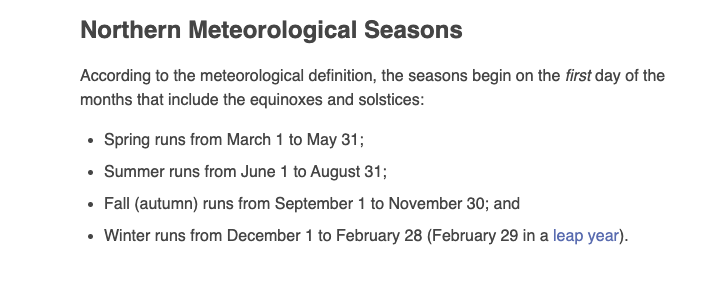

from: https://www.timeanddate.com/calendar/aboutseasons.html